In [1]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
palette = sns.color_palette()

In [3]:
# Load the iris dataset
iris = sns.load_dataset('iris')
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [5]:
model = smf.ols('sepal_width ~ species', data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

# Print the ANOVA table
print("ANOVA table for sepal_width:")
print(anova_table)

ANOVA table for sepal_width:
             df     sum_sq   mean_sq         F        PR(>F)
species     2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual  147.0  16.962000  0.115388       NaN           NaN


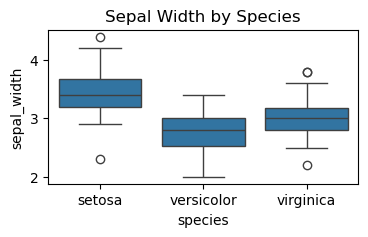

In [6]:
# Plot the data
plt.figure(figsize=(4, 2))
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Sepal Width by Species')
plt.show()

-----

In [7]:
setosa_sepal_width = iris[iris['species'] == 'setosa']['sepal_width']
virginica_sepal_width = iris[iris['species'] == 'virginica']['sepal_width']
versicolor_sepal_width = iris[iris['species'] == 'versicolor']['sepal_width']

In [8]:
setosa_n = len(setosa_sepal_width)
virginica_n = len(virginica_sepal_width)
versicolor_n = len(versicolor_sepal_width)


n_obs = len(iris['species'])
n_species =len(set(iris['species']))


df_within = (n_obs-n_species)
df_between = (n_species-1)

In [9]:
setosa_n, n_obs, df_within, df_between

(50, 150, 147, 2)

In [10]:
grand_mean = iris['sepal_width'].mean()
species_mean = iris[['species','sepal_width']].groupby('species').mean().to_dict()['sepal_width']

In [11]:
grand_mean,species_mean

(3.0573333333333337,
 {'setosa': 3.428, 'versicolor': 2.77, 'virginica': 2.9739999999999998})

__within group sum of squares__

In [12]:
setosa_ssw = np.sum((setosa_sepal_width - species_mean['setosa'])**2)
virginica_ssw = np.sum((virginica_sepal_width - species_mean['virginica'])**2)
versicolor_ssw = np.sum((versicolor_sepal_width - species_mean['versicolor'])**2)

In [13]:
total_ssw = setosa_ssw + virginica_ssw + versicolor_ssw
total_ssw

16.962

In [14]:
mean_squares_ssw = total_ssw / df_within
mean_squares_ssw

0.11538775510204081

__between group sum of squares__

In [15]:
setosa_ssb = len(setosa_sepal_width) * (species_mean['setosa'] - grand_mean)**2
virginica_ssb = len(virginica_sepal_width) * (species_mean['virginica'] - grand_mean)**2
versicolor_ssb = len(versicolor_sepal_width) * (species_mean['versicolor'] - grand_mean)**2

In [16]:
total_ssb = setosa_ssb + virginica_ssb + versicolor_ssb
total_ssb

11.344933333333332

In [17]:
mean_squares_ssb = total_ssb/ df_between
mean_squares_ssb

5.672466666666666

__F value__

In [18]:
observed_F_ratio = mean_squares_ssb/mean_squares_ssw
observed_F_ratio

49.16004008961207

In [19]:
alpha = 0.05

In [20]:
critical_F_ratio = stats.f.ppf(1 - alpha, df_between, df_within)
critical_F_ratio

3.057620651649394

In [21]:
(1 - stats.f.cdf(observed_F_ratio, df_between, df_within))

1.1102230246251565e-16

In [22]:
anova_result = stats.f_oneway(
    iris[iris['species'] == 'setosa']['sepal_width'],
    iris[iris['species'] == 'versicolor']['sepal_width'],
    iris[iris['species'] == 'virginica']['sepal_width']
)
anova_result

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

In [23]:
observed_F_ratio

49.16004008961207

In [29]:
stats.f.sf(observed_F_ratio, df_between, df_within)

4.492017133309115e-17

In [24]:
from scipy.special import fdtrc

In [25]:
anova_result.pvalue == fdtrc(df_between, df_within, observed_F_ratio)

True

-----

### Tukey test

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
model = ols('sepal_width ~ species', data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

# Print the ANOVA table
print("ANOVA table for sepal_width:")
print(anova_table)

ANOVA table for sepal_width:
             df     sum_sq   mean_sq         F        PR(>F)
species     2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual  147.0  16.962000  0.115388       NaN           NaN


In [28]:
ssw = anova_table['sum_sq']['Residual']
df_within = anova_table['df']['Residual']
ssw, df_within

(16.961999999999996, 147.0)

In [29]:
ms_within = ssw / df_within
ms_within

0.11538775510204079

In [30]:
tukey = pairwise_tukeyhsd(endog=iris['sepal_width'], groups=iris['species'], alpha=0.05,)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


In [31]:
(versicolor_sepal_width.mean() - setosa_sepal_width.mean()),\
(virginica_sepal_width.mean() - setosa_sepal_width.mean()),\
(virginica_sepal_width.mean() - versicolor_sepal_width.mean())

(-0.6579999999999995, -0.45399999999999974, 0.20399999999999974)

In [32]:
group_sizes = iris['species'].value_counts()
group_sizes

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [56]:
SEM = np.sqrt(ms_within/50)
print("Standard Error of Mean Differences (SEM):", SEM)

Standard Error of Mean Differences (SEM): 0.04803909972138129


In [57]:
from statsmodels.stats.libqsturng import psturng, qsturng
import scipy.stats as stats


In [58]:
q_critical = qsturng(1 - alpha, 3, df_within)
q_critical, tukey.q_crit

(3.3486786077613293, 3.348424061167291)

In [59]:
((versicolor_sepal_width.mean() - setosa_sepal_width.mean()) - q_critical * SEM , (versicolor_sepal_width.mean() - setosa_sepal_width.mean()) + q_critical * SEM),\
((virginica_sepal_width.mean() - setosa_sepal_width.mean()) - q_critical * SEM , (virginica_sepal_width.mean() - setosa_sepal_width.mean()) + q_critical * SEM),\
((virginica_sepal_width.mean() - versicolor_sepal_width.mean()) - q_critical * SEM , (virginica_sepal_width.mean() - versicolor_sepal_width.mean()) + q_critical * SEM),

((-0.8188675055731023, -0.4971324944268967),
 (-0.6148675055731025, -0.293132494426897),
 (0.04313249442689698, 0.3648675055731025))

In [49]:
tukey.std_pairs

array([0.0480391, 0.0480391, 0.0480391])

In [50]:
tukey.meandiffs/tukey.std_pairs, tukey.pvalues

(array([-13.69717592,  -9.45063506,   4.24654086]),
 array([2.15383267e-14, 1.36073197e-09, 8.78020571e-03]))

In [51]:
q_stat = (setosa_sepal_width.mean() - versicolor_sepal_width.mean())/SEM
q_stat, psturng(q_stat,3,147)

(13.697175921619868, 0.001)

In [52]:
q_stat = (setosa_sepal_width.mean() - virginica_sepal_width.mean())/SEM
q_stat, psturng(q_stat,3,147)

(9.4506350583821, 0.001)

In [53]:
q_stat = (versicolor_sepal_width.mean() - virginica_sepal_width.mean())/SEM
q_stat, psturng(-q_stat,3,147)

(-4.246540863237768, array([0.00877884]))